<a href="https://colab.research.google.com/github/Fenndy999/GestionRecursosHumanos/blob/master/Copia_de_ProyectoML_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Regresión - Machine Learning

## Predicción de Precios de Vehículos

**Grupo 4**

**Profesor:** Ramon

---

### Integrantes

- Anthony Guzman – 2023-1182
- Mario De Jesus Suero De Leon – 2024-0263
- Alberth fenndy cornelio maun 2023-1331
-

## 1. Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Any, Tuple
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

print("Librerías importadas correctamente")
print(f"Versión de scikit-learn: {__import__('sklearn').__version__}")
print(f"Versión de pandas: {pd.__version__}")

Librerías importadas correctamente
Versión de scikit-learn: 1.6.1
Versión de pandas: 2.2.2


## 2. Carga del Dataset

In [ ]:
def cargar_dataset(ruta: str) -> pd.DataFrame:
    """
    Carga el dataset desde un archivo CSV y muestra información básica.

    Args:
        ruta: Ruta del archivo CSV

    Returns:
        DataFrame con los datos cargados
    """
    df = pd.read_csv(ruta)
    print(f"Dataset cargado exitosamente")
    print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
    print(f"\nColumnas: {list(df.columns)}")
    return df

# Cargar datos (para Colab, usar google.colab.files.upload())
from google.colab import files
uploaded = files.upload()
df = cargar_dataset(next(iter(uploaded)))
df.head(10)

Saving vehicles_regression.csv to vehicles_regression.csv
Dataset cargado exitosamente
Dimensiones: 1000 filas x 7 columnas

Columnas: ['marca', 'modelo', 'año', 'kilometraje', 'motor_litros', 'transmision', 'precio']


,marca,modelo,año,kilometraje,motor_litros,transmision,precio
0,Nissan,Sentra,2006,16093,2.0,Manual,4764.884798
1,Hyundai,Sentra,2010,182643,1.8,Automatica,-1254.688798
2,Ford,Sentra,2009,136265,2.3,Manual,451.296625
3,Hyundai,Sentra,2008,105311,3.0,Manual,7590.906186
4,Hyundai,Elantra,2013,22569,3.4,Automatica,15754.895624
5,Honda,Elantra,2012,16190,3.0,Automatica,8531.670021
6,Ford,Civic,2001,67824,3.2,Manual,3724.429002
7,Ford,Corolla,2002,178824,2.6,Manual,573.317950
8,Ford,Sentra,2006,168399,3.1,Manual,2077.440367
9,Hyundai,Civic,2020,47070,3.0,Manual,13168.021534


## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Información General

In [ ]:
print("="*70)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*70)

print(f"\nDimensiones: {df.shape}")
print(f"\nTipos de datos:")
print(df.dtypes)

print(f"\nValores nulos:")
print(df.isnull().sum())

print(f"\nEstadísticas descriptivas:")
df.describe()

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: (1000, 7)

Tipos de datos:
marca            object
modelo           object
año               int64
kilometraje       int64
motor_litros    float64
transmision      object
precio          float64
dtype: object

Valores nulos:
marca           0
modelo          0
año             0
kilometraje     0
motor_litros    0
transmision     0
precio          0
dtype: int64

Estadísticas descriptivas:


,año,kilometraje,motor_litros,precio
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2011.130000,129456.806000,2.428000,4478.299150
std,6.795828,71275.603292,0.625978,5502.274405
min,2000.000000,5138.000000,1.300000,-11129.112566
25%,2005.000000,67341.250000,1.900000,740.848504
50%,2011.000000,133384.000000,2.400000,4517.612600
75%,2017.000000,191384.500000,3.000000,8306.722181
max,2022.000000,249576.000000,3.500000,21502.325879


### 3.2 Visualizaciones

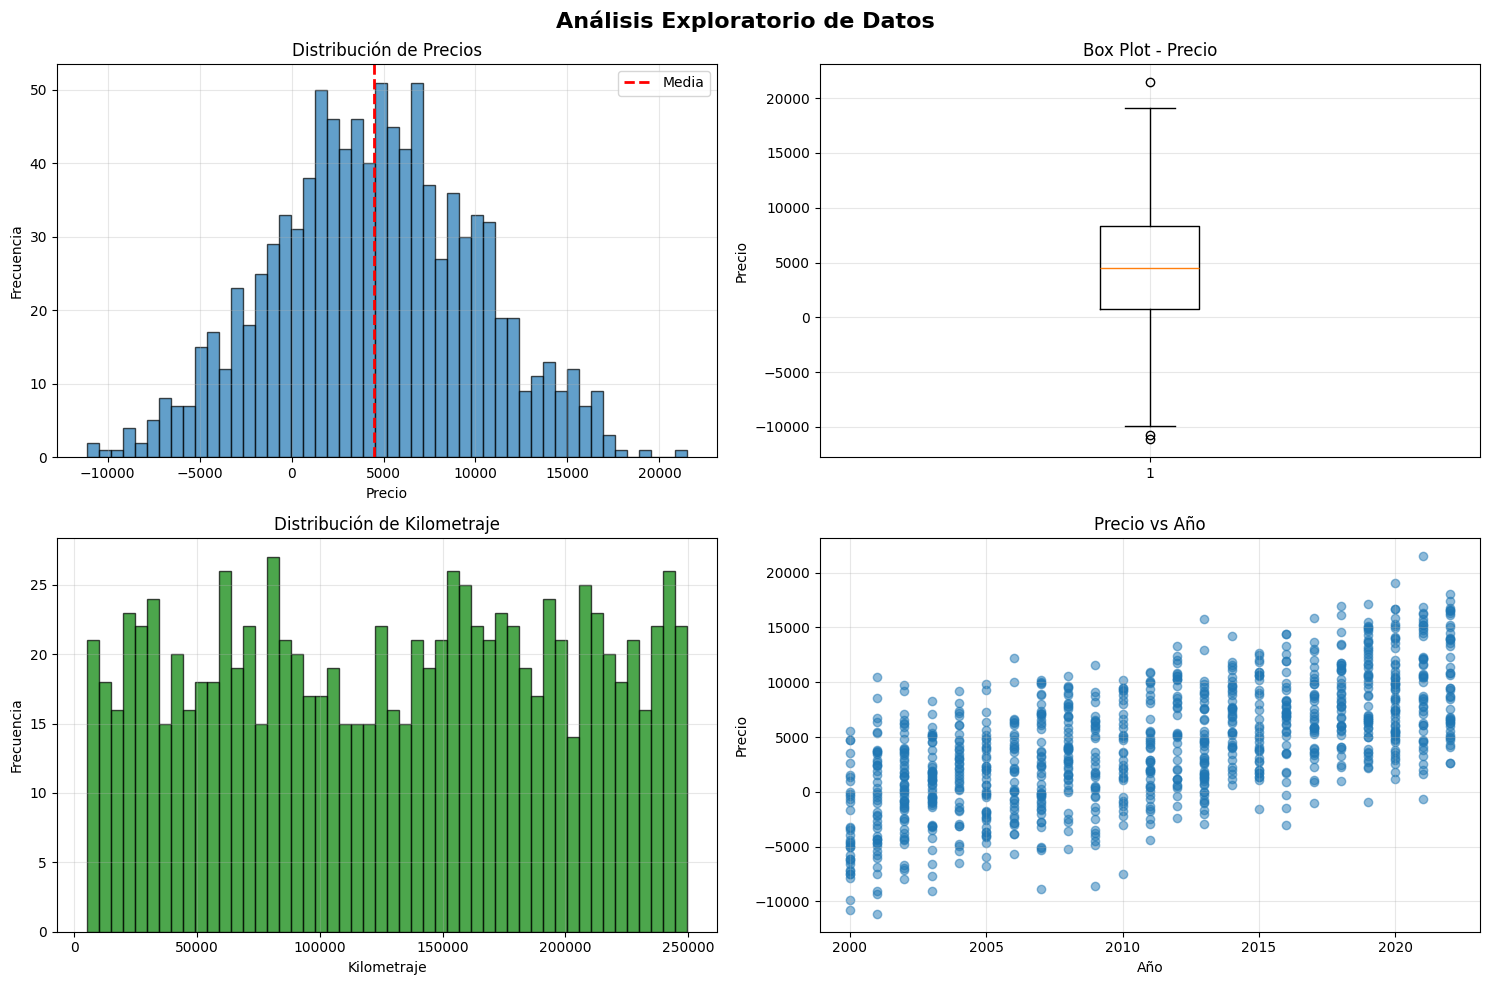

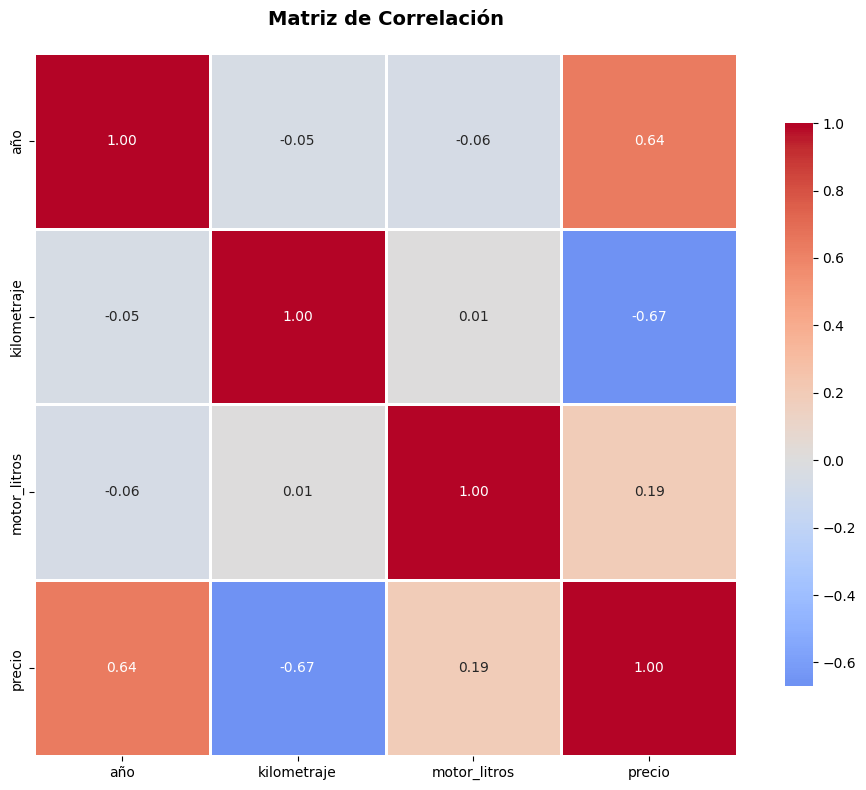

In [ ]:
def crear_visualizaciones_eda(df: pd.DataFrame) -> None:
    """
    Crea visualizaciones exploratorias del dataset.

    Args:
        df: DataFrame a visualizar
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Análisis Exploratorio de Datos', fontsize=16, fontweight='bold')

    # Distribución de precio
    axes[0, 0].hist(df['precio'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(df['precio'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
    axes[0, 0].set_xlabel('Precio')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].set_title('Distribución de Precios')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Box plot de precio
    axes[0, 1].boxplot(df['precio'], vert=True)
    axes[0, 1].set_ylabel('Precio')
    axes[0, 1].set_title('Box Plot - Precio')
    axes[0, 1].grid(True, alpha=0.3)

    # Distribución de kilometraje
    axes[1, 0].hist(df['kilometraje'], bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[1, 0].set_xlabel('Kilometraje')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].set_title('Distribución de Kilometraje')
    axes[1, 0].grid(True, alpha=0.3)

    # Precio vs año
    axes[1, 1].scatter(df['año'], df['precio'], alpha=0.5)
    axes[1, 1].set_xlabel('Año')
    axes[1, 1].set_ylabel('Precio')
    axes[1, 1].set_title('Precio vs Año')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Matriz de correlación
    plt.figure(figsize=(10, 8))
    correlacion = df.select_dtypes(include=[np.number]).corr()
    sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

crear_visualizaciones_eda(df)

## 4. Preprocesamiento de Datos

In [ ]:
def preprocesar_datos(df: pd.DataFrame) -> Tuple:
    """
    Preprocesa el dataset aplicando transformaciones necesarias.

    Args:
        df: DataFrame original

    Returns:
        Tupla con (preprocessor, X, y)
    """
    # Separar características y objetivo
    y = df["precio"]
    X = df.drop("precio", axis=1)

    # Definir características numéricas y categóricas
    numeric_features = ["año", "kilometraje", "motor_litros"]
    categorical_features = ["marca", "modelo", "transmision"]

    # Crear preprocesador
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
        ]
    )

    print("Preprocesamiento configurado:")
    print(f"  - Variables numéricas (StandardScaler): {numeric_features}")
    print(f"  - Variables categóricas (OneHotEncoder): {categorical_features}")

    return preprocessor, X, y

preprocessor, X, y = preprocesar_datos(df)

Preprocesamiento configurado:
  - Variables numéricas (StandardScaler): ['año', 'kilometraje', 'motor_litros']
  - Variables categóricas (OneHotEncoder): ['marca', 'modelo', 'transmision']


## 5. División del Dataset

In [ ]:
# División en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("División del dataset completada:")
print(f"  - Entrenamiento: {X_train.shape[0]} muestras ({(X_train.shape[0]/len(X)*100):.0f}%)")
print(f"  - Prueba: {X_test.shape[0]} muestras ({(X_test.shape[0]/len(X)*100):.0f}%)")
print(f"  - Random state: 42 (reproducibilidad)")

División del dataset completada:
  - Entrenamiento: 800 muestras (80%)
  - Prueba: 200 muestras (20%)
  - Random state: 42 (reproducibilidad)


## 6. Definición de Modelos de Regresión

In [ ]:
def crear_modelos() -> Dict[str, Any]:
    """
    Define los 8 modelos de regresión con sus hiperparámetros.

    Returns:
        Diccionario con nombre y modelo
    """
    modelos = {
        "Ordinary Least Squares": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0, random_state=42),
        "Bayesian Regression": BayesianRidge(max_iter=300),
        "Lasso Regression": Lasso(alpha=0.001, max_iter=10000, random_state=42),
        "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5, weights='uniform'),
        "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=15,
                                              random_state=42, n_jobs=-1),
        "Support Vector Machine": SVR(kernel="rbf", C=100, gamma="scale", epsilon=0.1),
        "Neural Network MLP": MLPRegressor(hidden_layer_sizes=(64, 32),
                                           activation='relu',
                                           solver='adam',
                                           max_iter=1000,
                                           random_state=42,
                                           early_stopping=True)
    }

    print("Modelos definidos:")
    for i, nombre in enumerate(modelos.keys(), 1):
        print(f"  {i}. {nombre}")

    return modelos

modelos = crear_modelos()

Modelos definidos:
  1. Ordinary Least Squares
  2. Ridge Regression
  3. Bayesian Regression
  4. Lasso Regression
  5. K-Nearest Neighbors
  6. Random Forest
  7. Support Vector Machine
  8. Neural Network MLP


## 7. Entrenamiento y Evaluación de Modelos

In [ ]:
def evaluar_modelos(modelos: Dict[str, Any], preprocessor,
                   X_train, X_test, y_train, y_test) -> pd.DataFrame:
    """
    Entrena y evalúa cada modelo calculando múltiples métricas.

    Args:
        modelos: Diccionario de modelos a evaluar
        preprocessor: Preprocesador de datos
        X_train, X_test, y_train, y_test: Datos de entrenamiento y prueba

    Returns:
        DataFrame con resultados comparativos
    """
    import time
    resultados = {}

    print("Entrenando modelos...\n")

    for nombre, modelo in modelos.items():
        print(f"Entrenando: {nombre}...")
        inicio = time.time()

        # Crear pipeline
        pipe = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", modelo)
        ])

        # Entrenar
        pipe.fit(X_train, y_train)

        # Predecir
        y_pred_train = pipe.predict(X_train)
        y_pred_test = pipe.predict(X_test)

        tiempo = time.time() - inicio

        # Calcular métricas
        resultados[nombre] = {
            "MSE_Train": mean_squared_error(y_train, y_pred_train),
            "MSE_Test": mean_squared_error(y_test, y_pred_test),
            "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
            "MAE_Test": mean_absolute_error(y_test, y_pred_test),
            "R2_Train": r2_score(y_train, y_pred_train),
            "R2_Test": r2_score(y_test, y_pred_test),
            "Tiempo (s)": tiempo
        }

        print(f"  Completado en {tiempo:.3f} segundos | R² Test: {resultados[nombre]['R2_Test']:.4f}\n")

    df_resultados = pd.DataFrame(resultados).T.sort_values("R2_Test", ascending=False)
    return df_resultados

df_resultados = evaluar_modelos(modelos, preprocessor, X_train, X_test, y_train, y_test)

print("\n" + "="*80)
print("RESULTADOS COMPARATIVOS")
print("="*80)
df_resultados

Entrenando modelos...

Entrenando: Ordinary Least Squares...
  Completado en 0.057 segundos | R² Test: 0.8857

Entrenando: Ridge Regression...
  Completado en 0.025 segundos | R² Test: 0.8858

Entrenando: Bayesian Regression...
  Completado en 0.024 segundos | R² Test: 0.8858

Entrenando: Lasso Regression...
  Completado en 0.139 segundos | R² Test: 0.8857

Entrenando: K-Nearest Neighbors...
  Completado en 0.036 segundos | R² Test: 0.8083

Entrenando: Random Forest...
  Completado en 0.946 segundos | R² Test: 0.8757

Entrenando: Support Vector Machine...
  Completado en 0.104 segundos | R² Test: 0.6311

Entrenando: Neural Network MLP...
  Completado en 1.242 segundos | R² Test: 0.8616


RESULTADOS COMPARATIVOS


,MSE_Train,MSE_Test,RMSE_Test,MAE_Test,R2_Train,R2_Test,Tiempo (s)
Bayesian Regression,3.800869e+06,4.123142e+06,2030.552191,1622.117217,0.867745,0.885776,0.023774
Ridge Regression,3.800774e+06,4.124012e+06,2030.766331,1622.164498,0.867748,0.885752,0.025261
Lasso Regression,3.800731e+06,4.125212e+06,2031.061729,1622.223615,0.867750,0.885719,0.138718
Ordinary Least Squares,3.800731e+06,4.125216e+06,2031.062672,1622.224181,0.867750,0.885719,0.057071
Random Forest,6.113285e+05,4.487537e+06,2118.380715,1719.160942,0.978728,0.875681,0.946087
Neural Network MLP,4.132385e+06,4.996660e+06,2235.320919,1759.792594,0.856209,0.861577,1.241950
K-Nearest Neighbors,4.655052e+06,6.918648e+06,2630.332331,2147.433070,0.838023,0.808332,0.035913
Support Vector Machine,9.671910e+06,1.331491e+07,3648.960749,2850.214077,0.663456,0.631135,0.103577


## 8. Análisis de Resultados

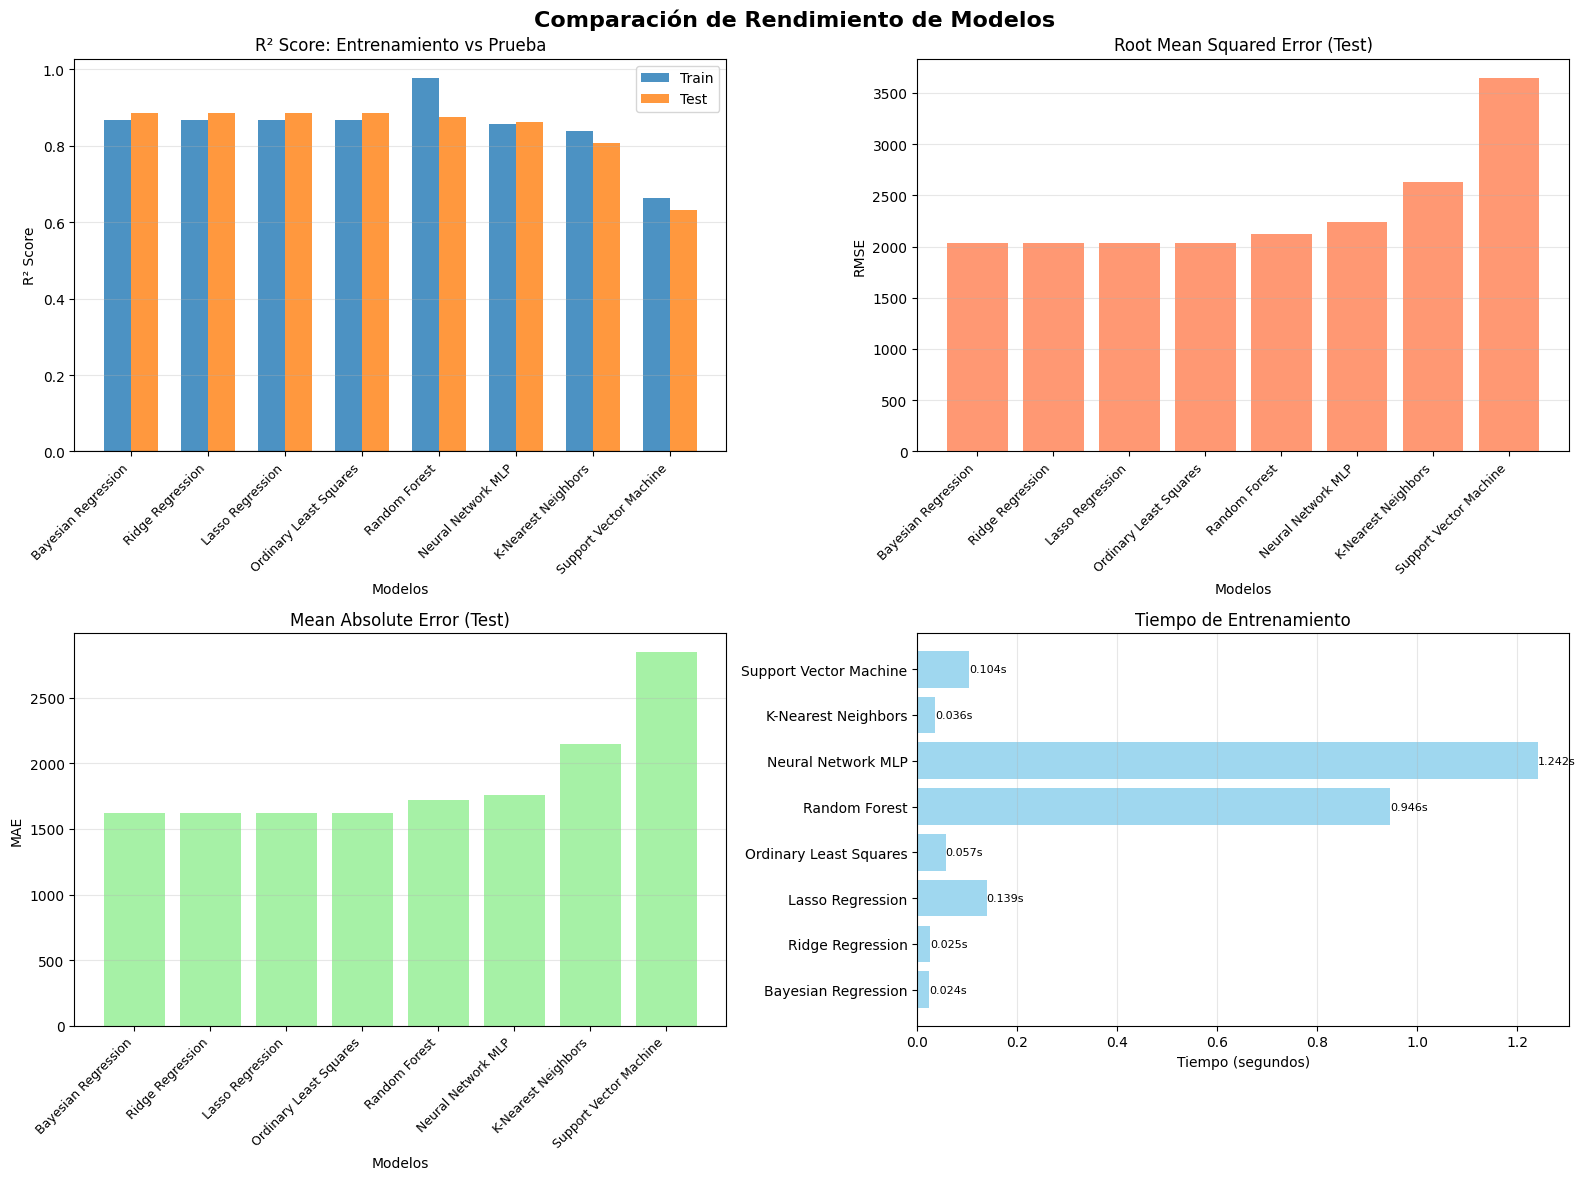


MEJOR MODELO: Bayesian Regression
R² Score (Test): 0.8858
RMSE (Test): 2030.55
MAE (Test): 1622.12


In [ ]:
def visualizar_resultados(df_resultados: pd.DataFrame) -> None:
    """
    Crea visualizaciones comparativas de los resultados.

    Args:
        df_resultados: DataFrame con las métricas de los modelos
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Comparación de Rendimiento de Modelos', fontsize=16, fontweight='bold')

    # R² Score
    ax = axes[0, 0]
    x = np.arange(len(df_resultados))
    width = 0.35
    ax.bar(x - width/2, df_resultados['R2_Train'], width, label='Train', alpha=0.8)
    ax.bar(x + width/2, df_resultados['R2_Test'], width, label='Test', alpha=0.8)
    ax.set_xlabel('Modelos')
    ax.set_ylabel('R² Score')
    ax.set_title('R² Score: Entrenamiento vs Prueba')
    ax.set_xticks(x)
    ax.set_xticklabels(df_resultados.index, rotation=45, ha='right', fontsize=9)
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

    # RMSE
    ax = axes[0, 1]
    ax.bar(range(len(df_resultados)), df_resultados['RMSE_Test'], alpha=0.8, color='coral')
    ax.set_xlabel('Modelos')
    ax.set_ylabel('RMSE')
    ax.set_title('Root Mean Squared Error (Test)')
    ax.set_xticks(range(len(df_resultados)))
    ax.set_xticklabels(df_resultados.index, rotation=45, ha='right', fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')

    # MAE
    ax = axes[1, 0]
    ax.bar(range(len(df_resultados)), df_resultados['MAE_Test'], alpha=0.8, color='lightgreen')
    ax.set_xlabel('Modelos')
    ax.set_ylabel('MAE')
    ax.set_title('Mean Absolute Error (Test)')
    ax.set_xticks(range(len(df_resultados)))
    ax.set_xticklabels(df_resultados.index, rotation=45, ha='right', fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')

    # Tiempo de entrenamiento
    ax = axes[1, 1]
    bars = ax.barh(df_resultados.index, df_resultados['Tiempo (s)'], alpha=0.8, color='skyblue')
    ax.set_xlabel('Tiempo (segundos)')
    ax.set_title('Tiempo de Entrenamiento')
    ax.grid(True, alpha=0.3, axis='x')

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
               f'{width:.3f}s', ha='left', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

    # Identificar mejor modelo
    mejor_modelo = df_resultados.index[0]
    mejor_r2 = df_resultados['R2_Test'].iloc[0]

    print("\n" + "="*80)
    print(f"MEJOR MODELO: {mejor_modelo}")
    print(f"R² Score (Test): {mejor_r2:.4f}")
    print(f"RMSE (Test): {df_resultados['RMSE_Test'].iloc[0]:.2f}")
    print(f"MAE (Test): {df_resultados['MAE_Test'].iloc[0]:.2f}")
    print("="*80)

visualizar_resultados(df_resultados)

### 8.1 Análisis de Overfitting

In [ ]:
print("Análisis de Overfitting (Diferencia R² Train - Test):\n")
print("="*80)

df_resultados['Diferencia_R2'] = abs(df_resultados['R2_Train'] - df_resultados['R2_Test'])
df_overfitting = df_resultados[['R2_Train', 'R2_Test', 'Diferencia_R2']].sort_values('Diferencia_R2')

for idx, row in df_overfitting.iterrows():
    diff = row['Diferencia_R2']
    status = "Excelente balance" if diff < 0.05 else "Buen balance" if diff < 0.1 else "Posible overfitting"
    print(f"{idx:30s} | Train: {row['R2_Train']:.4f} | Test: {row['R2_Test']:.4f} | Δ: {diff:.4f} | {status}")

print("="*80)

Análisis de Overfitting (Diferencia R² Train - Test):

Neural Network MLP             | Train: 0.8562 | Test: 0.8616 | Δ: 0.0054 | Excelente balance
Ordinary Least Squares         | Train: 0.8677 | Test: 0.8857 | Δ: 0.0180 | Excelente balance
Lasso Regression               | Train: 0.8677 | Test: 0.8857 | Δ: 0.0180 | Excelente balance
Ridge Regression               | Train: 0.8677 | Test: 0.8858 | Δ: 0.0180 | Excelente balance
Bayesian Regression            | Train: 0.8677 | Test: 0.8858 | Δ: 0.0180 | Excelente balance
K-Nearest Neighbors            | Train: 0.8380 | Test: 0.8083 | Δ: 0.0297 | Excelente balance
Support Vector Machine         | Train: 0.6635 | Test: 0.6311 | Δ: 0.0323 | Excelente balance
Random Forest                  | Train: 0.9787 | Test: 0.8757 | Δ: 0.1030 | Posible overfitting


## 9. Sistema de Predicción con Nuevos Datos

In [ ]:
def entrenar_mejor_modelo(mejor_modelo_nombre: str, modelos: Dict,
                         preprocessor, X_train, y_train):
    """
    Entrena el mejor modelo con todos los datos de entrenamiento.

    Args:
        mejor_modelo_nombre: Nombre del mejor modelo
        modelos: Diccionario de modelos
        preprocessor: Preprocesador
        X_train, y_train: Datos de entrenamiento

    Returns:
        Pipeline entrenado
    """
    modelo = modelos[mejor_modelo_nombre]
    pipeline_final = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", modelo)
    ])
    pipeline_final.fit(X_train, y_train)

    # Guardar modelo
    joblib.dump(pipeline_final, 'mejor_modelo.pkl')
    print(f"Modelo '{mejor_modelo_nombre}' entrenado y guardado como 'mejor_modelo.pkl'")

    return pipeline_final

def predecir_nuevos_datos():
    """
    Permite cargar un CSV y hacer predicciones con el mejor modelo.
    """
    print("Sube el archivo CSV con nuevas muestras...")
    from google.colab import files
    uploaded = files.upload()

    df_nuevo = pd.read_csv(next(iter(uploaded)))
    print(f"\nDatos cargados: {df_nuevo.shape[0]} muestras")
    print("\nPrimeras filas:")
    display(df_nuevo.head())

    # Cargar modelo guardado
    modelo_cargado = joblib.load('mejor_modelo.pkl')

    # Realizar predicciones
    predicciones = modelo_cargado.predict(df_nuevo)

    # Agregar predicciones al DataFrame
    df_nuevo['precio_predicho'] = predicciones

    print("\nPredicciones completadas:")
    print("="*80)
    display(df_nuevo)

    return df_nuevo

# Entrenar mejor modelo
mejor_modelo_nombre = df_resultados.index[0]
pipeline_final = entrenar_mejor_modelo(mejor_modelo_nombre, modelos,
                                       preprocessor, X_train, y_train)

Modelo 'Bayesian Regression' entrenado y guardado como 'mejor_modelo.pkl'


### 9.1 Prueba del Sistema de Predicción

In [ ]:
# Descomenta para probar el sistema de predicción
# df_predicciones = predecir_nuevos_datos()

print("Sistema de predicción listo para usar.")
print("Ejecuta la función predecir_nuevos_datos() para hacer predicciones.")

Sistema de predicción listo para usar.
Ejecuta la función predecir_nuevos_datos() para hacer predicciones.
